# Datasets

## load_diabetes

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()
type(dataset.data), type(dataset.target)

(numpy.ndarray, numpy.ndarray)

In [3]:
dataset.data.shape, dataset.target.shape

((442, 10), (442,))

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## load_iris

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [6]:
from sklearn.datasets import load_iris

In [7]:
dataset = load_iris()
type(dataset.data), type(dataset.target)

(numpy.ndarray, numpy.ndarray)

In [8]:
dataset.data.shape, dataset.target.shape

((150, 4), (150,))

In [9]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#  k-Nearest Neighbors (k-NN) Regression




In [14]:
import numpy as np
import math
class KNNRegressor:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X
    # print(type(self.X_train), self.X_train.shape)
    # print(self.X_train)
    self.y_train = y
    # print(type(self.y_train), self.y_train.shape)
    pass

  def predict(self, X):
    predictions = []
    # print(X.shape)
    # print(self.X_train.shape)
    # distance = np.sqrt(np.sum((self.X_train - X) ** 2, axis=1))
    for x in X:
      distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
      sorted_distances = np.array(np.argsort(distances))
      # print(np.argsort(distances))
      # print(type(sorted_distances), sorted_distances.shape)
      # print(sorted_distances)
      top_k = sorted_distances[:self.k]
      avg = top_k.mean()
      # print(avg)
    # print(type(distance), distance.shape)
      predictions.append(avg)
    return np.array(predictions)

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target)

knn_regressor = KNNRegressor(k=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 6763.44


Mean squared error: 4636.67


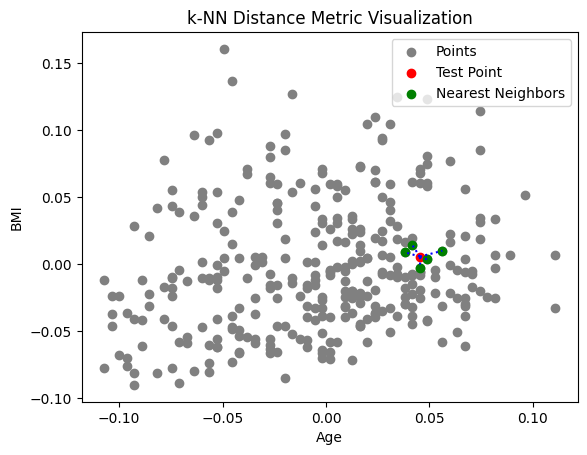

# k-Nearest Neighbors (k-NN) classifier

In [ ]:
import numpy as np

class KNNClassifier:
  def __init__(self, k=3):
    self.k = k
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    pass

  def predict(self, X):
    predictions = []
    return np.array(predictions)

In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
print(X_train.shape, y_train.shape)

knn_classifier = KNNClassifier(k=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))


(112, 4) (112,)


NameError: name 'KNNClassifier' is not defined

Accuracy: 0.97


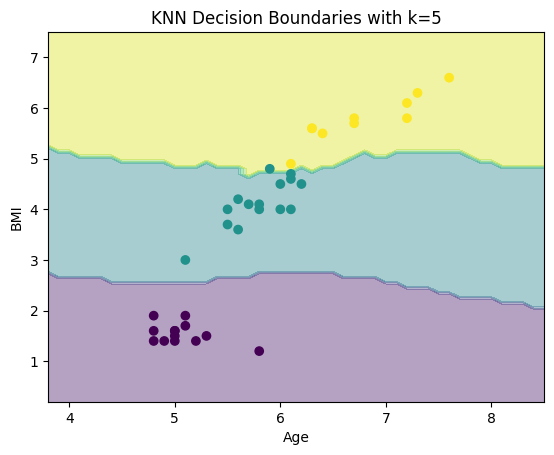

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
x1, x2 = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

knn_classifier = KNNClassifier(k=5)
knn_classifier.fit(X_train[:, [0,2]], y_train)
y_pred = knn_classifier.predict(X_test[:, [0,2]])
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Z = knn_classifier.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)
plt.contourf(x1, x2, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 2], c=y_test)
plt.title('KNN Decision Boundaries with k=5')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()